## DATA SETUP

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

In [2]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [3]:
ds, mw, stellar_model, imf, planet_model = data_setup(snapshot, resolution, sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-13 19:39:03,667 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-13 19:39:03,729 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-13 19:39:03,730 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-13 19:39:03,731 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-13 19:39:03,731 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-13 19:39:03,731 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-13 19:39:03,732 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-13 19:39:03,732 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-13 19:39:03,732 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-13 19:39:03,732 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [4]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles

In [5]:
def _mass_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","Masses"]
ds.add_field(("stars", "mass_weighted_planets"), function=_mass_weighted_planets, sampling_type="local", units="1/Msun")

def _star_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","main_sequence_stars"]
ds.add_field(("stars", "star_weighted_planets"), function=_star_weighted_planets, sampling_type="local", units="")

## CREATE DATA SOURCE

In [6]:
data_source = mw.sphere(radius=(50,"kpc"))

In [7]:
normal_vector = calculate_pca(mw.sphere(radius=(10,"kpc"))["stars","Coordinates"]).components_[-1]
rotated_data = rotated_dataset(data_source, mw.centre(), normal_vector, [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets")])

yt : [INFO     ] 2023-06-13 19:39:06,890 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-13 19:39:06,891 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-13 19:39:06,891 Parameters: domain_left_edge          = [-49.33338652 -49.33338652 -49.33338652]
yt : [INFO     ] 2023-06-13 19:39:06,892 Parameters: domain_right_edge         = [49.67298706 49.67298706 49.67298706]
yt : [INFO     ] 2023-06-13 19:39:06,892 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-13 19:39:06,894 Allocating for 3.430e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-06-13 19:39:07,114 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:07,114 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:07,115 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:07,115 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:07,117 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



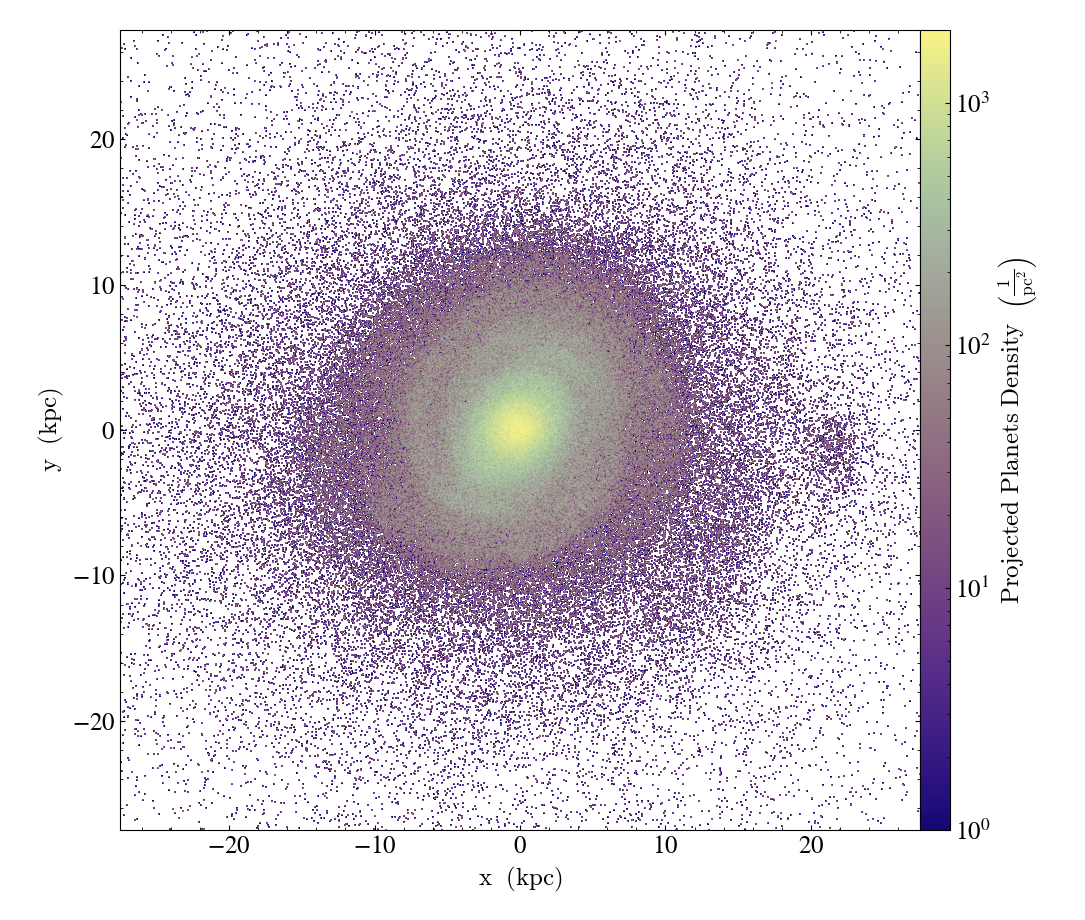

yt : [INFO     ] 2023-06-13 19:39:08,182 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:08,183 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:08,184 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:08,184 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:08,186 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-13 19:39:08,420 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



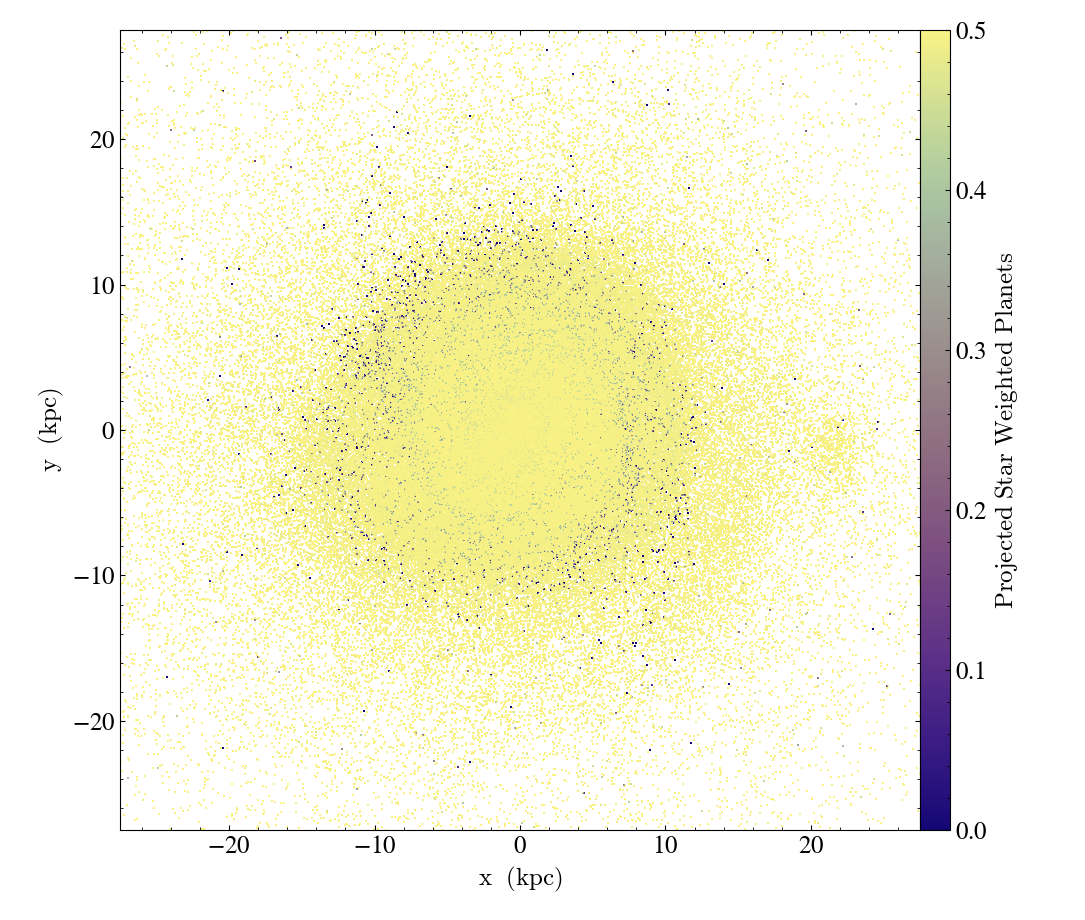
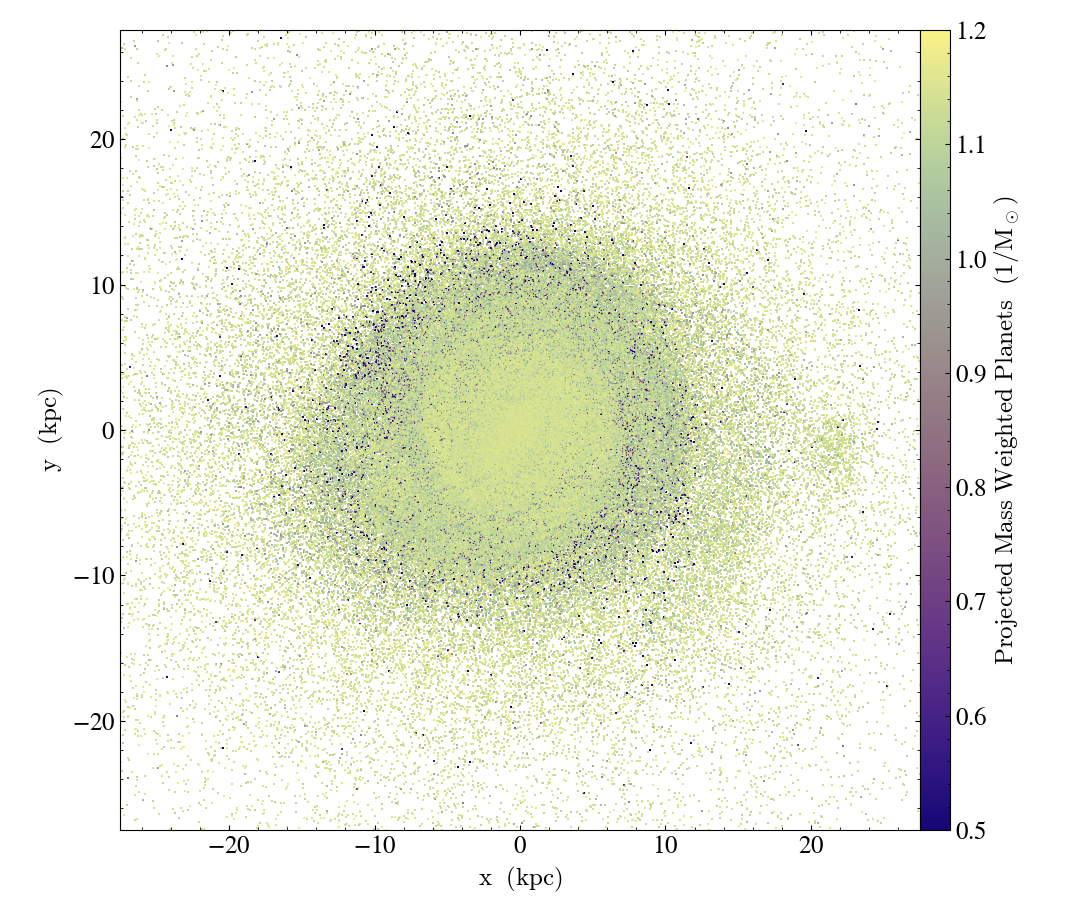

In [8]:
zplot, zplots = plot_maps(rotated_data, axis='z')

## SIDE-ON MAPS

yt : [INFO     ] 2023-06-13 19:39:09,213 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,213 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,214 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,214 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,215 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



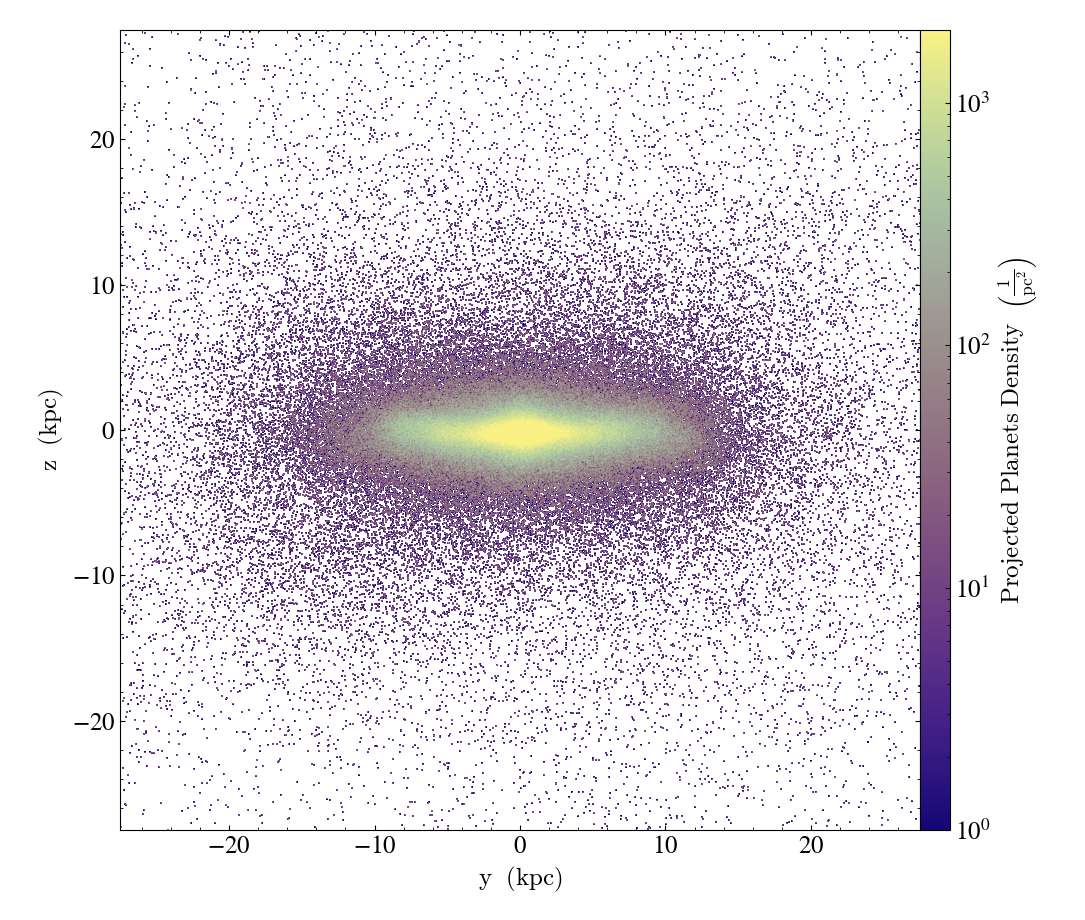

yt : [INFO     ] 2023-06-13 19:39:09,900 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,900 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,901 xlim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,902 ylim = -27.330200 27.669800
yt : [INFO     ] 2023-06-13 19:39:09,903 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-13 19:39:10,108 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



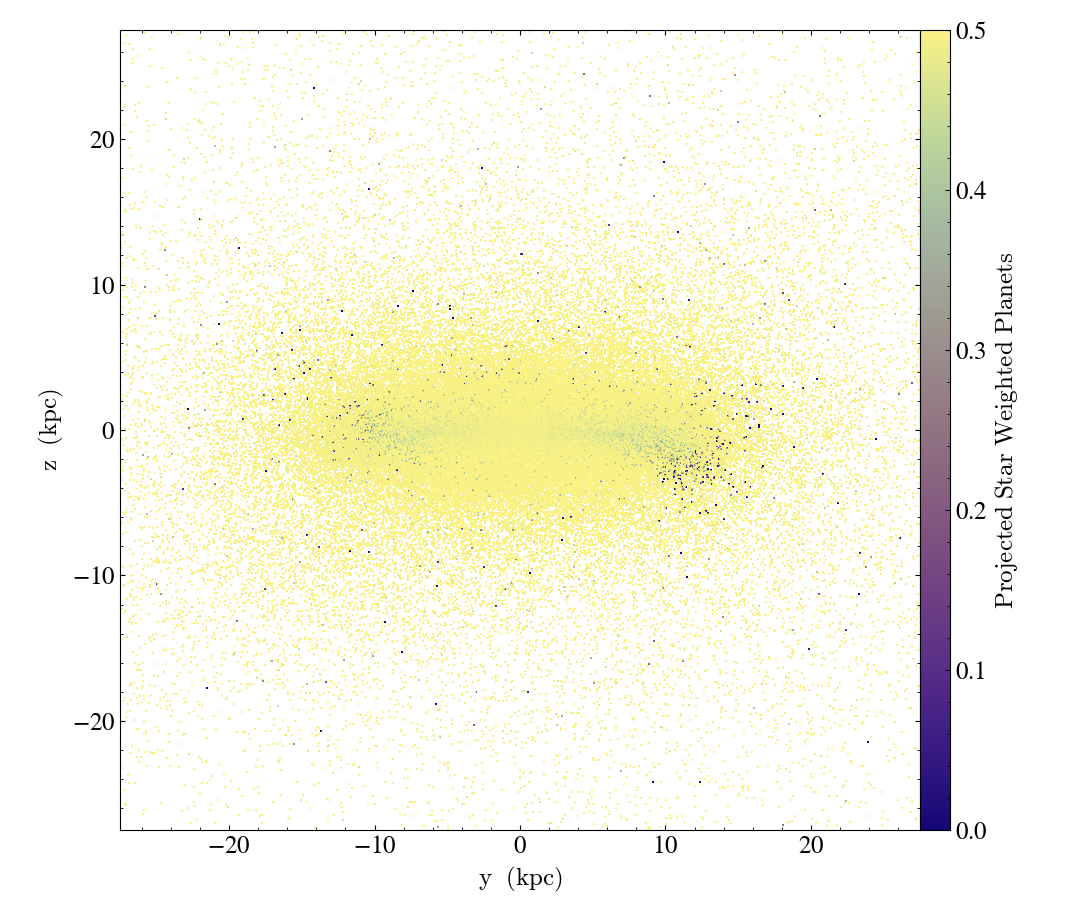
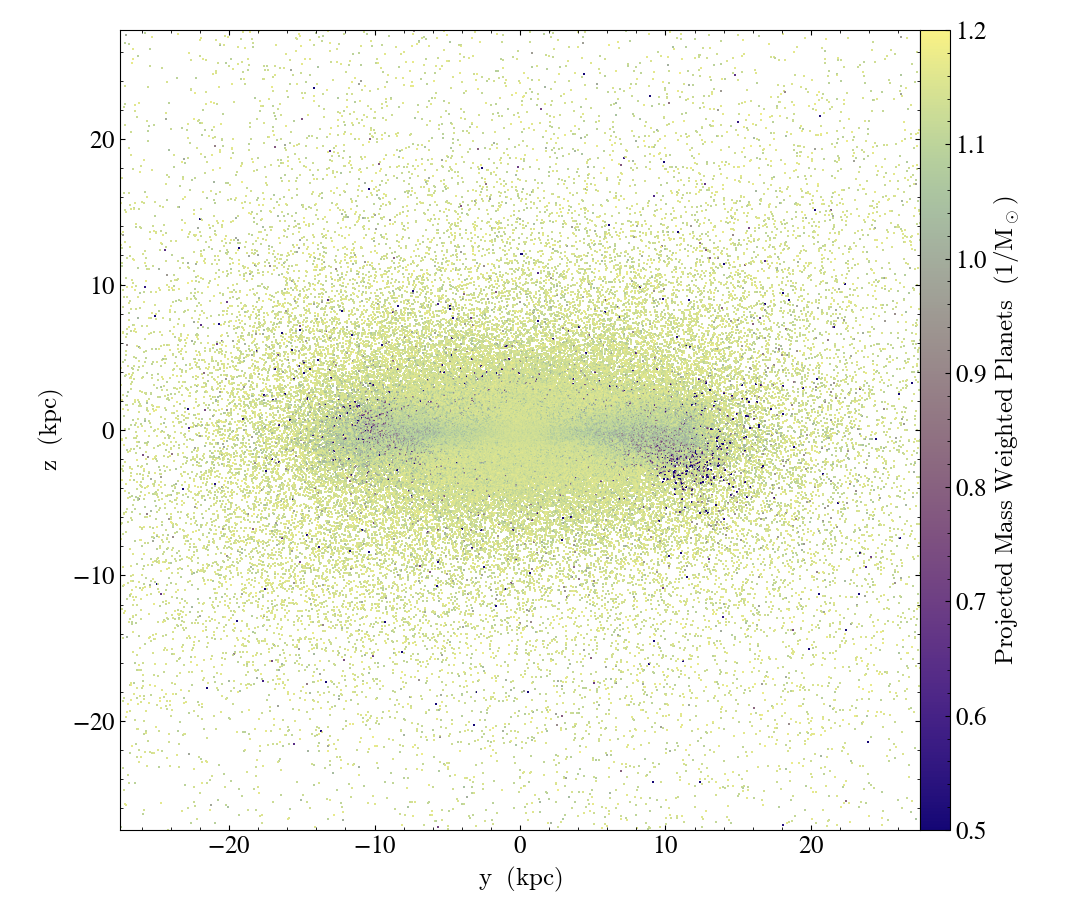

In [9]:
yplot, yplots = plot_maps(rotated_data, axis='x')

## 1D Profiles

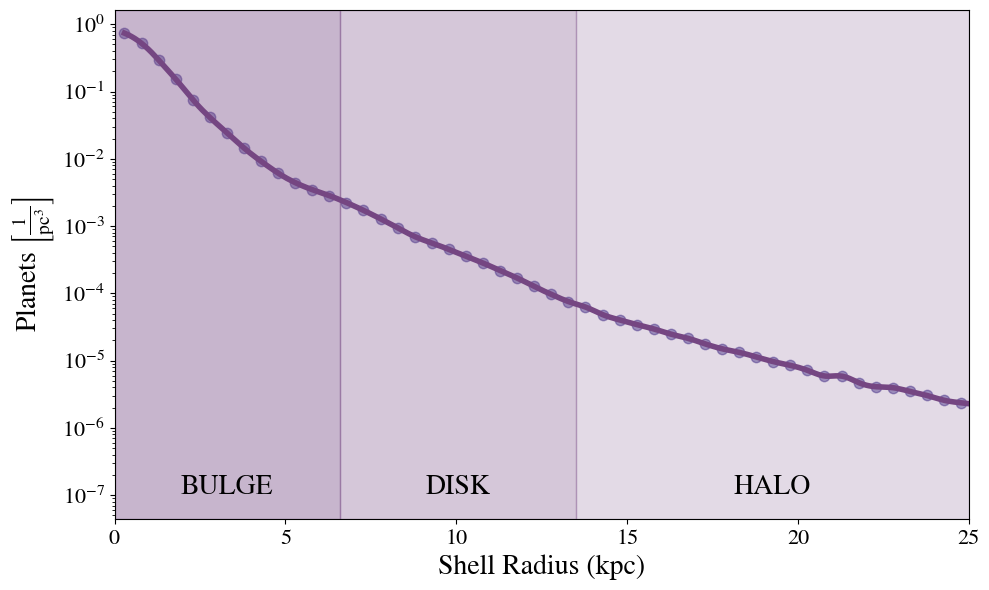

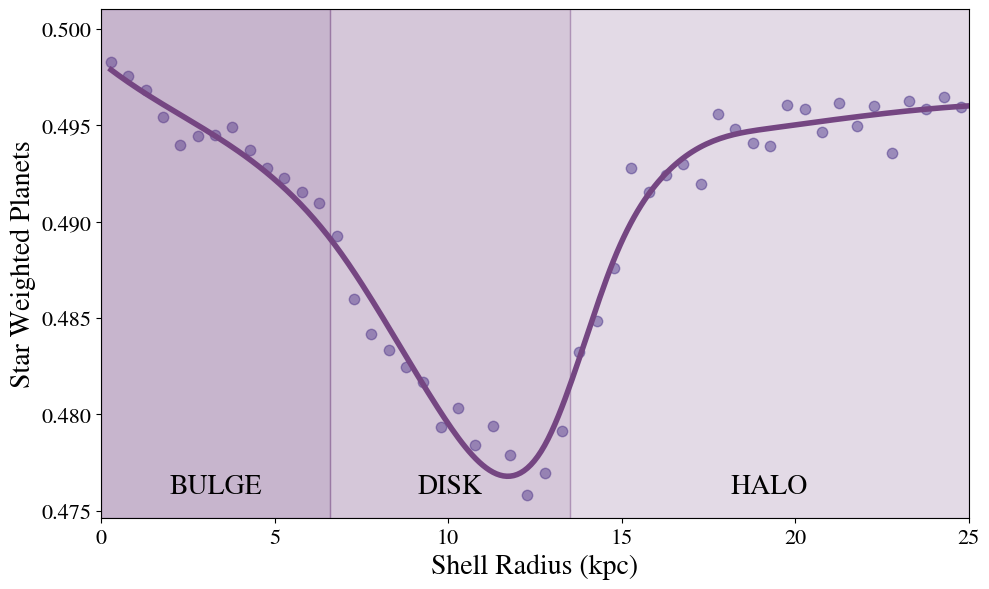

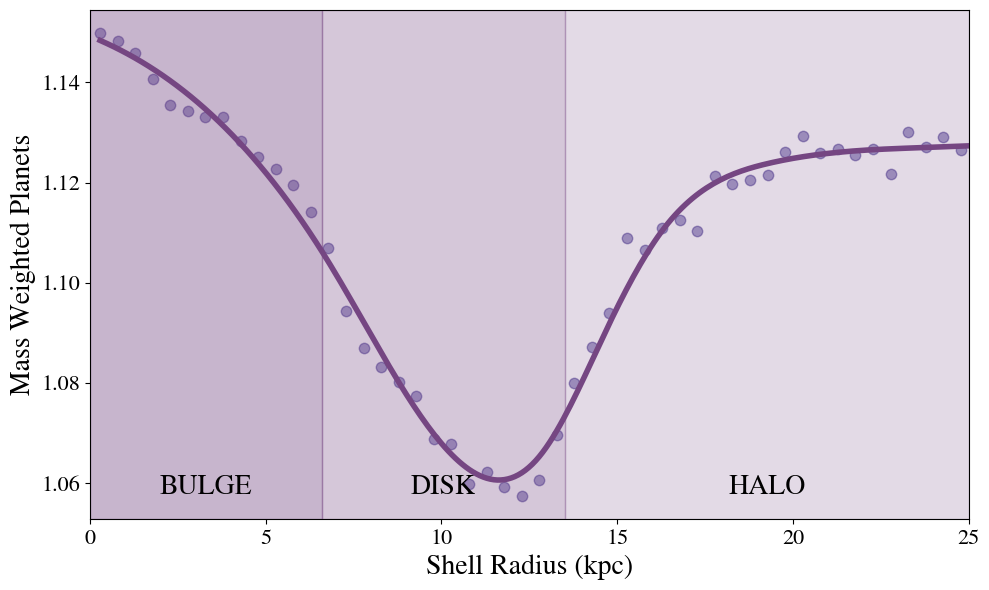

In [10]:
figs, axes = plot_1dprofiles(data_source, mw)

## 2D Profiles


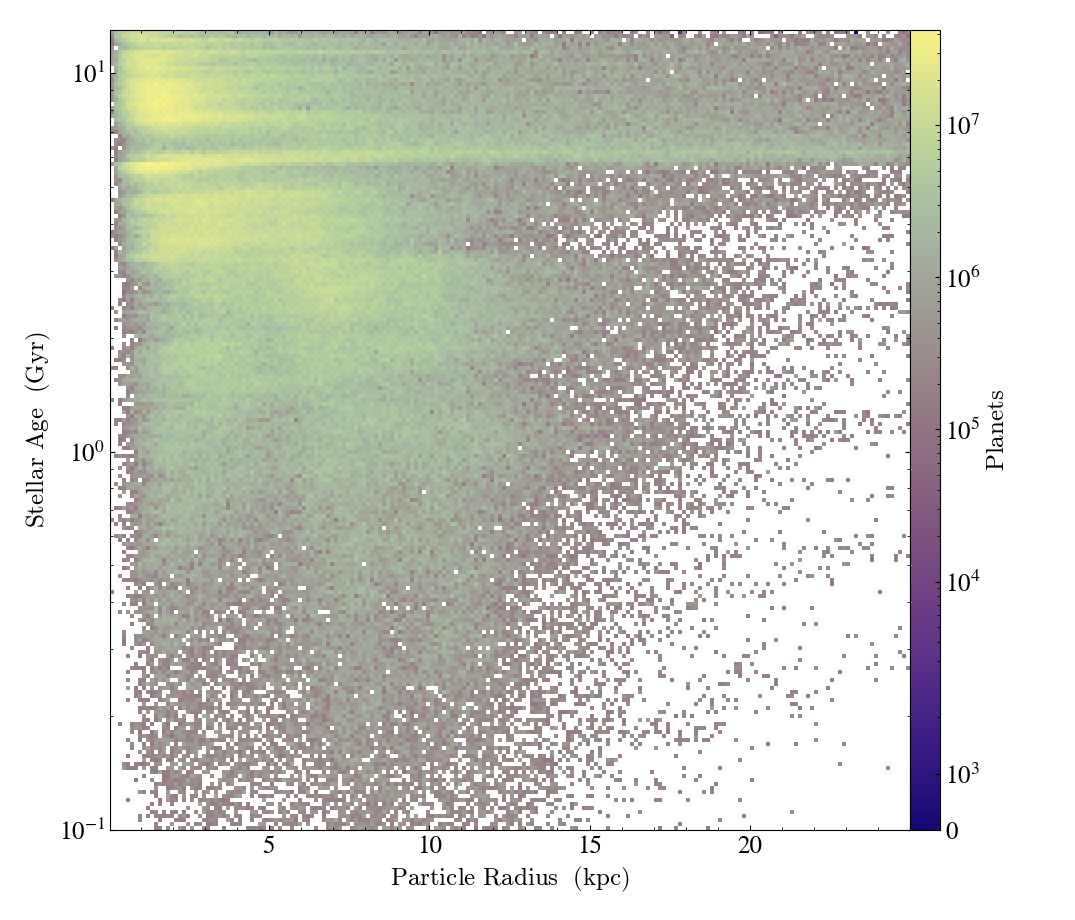

In [11]:
profile = yt.create_profile(
    mw.sphere(radius=ds.quan(25,'kpc')), # should be data_source
    [("stars", "particle_radius"), ("stars", "stellar_age")],
    n_bins=[200, 200],
    fields=[("stars", "planets")],
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=None,
    deposition = "cic",
)
plot = yt.PhasePlot.from_profile(profile)

plot.set_log(("stars", "particle_radius"), False)
plot.set_ylim( ymin=0.1, ymax=13)
plot.set_cmap(("stars", "planets"), "kelp")
plot.show()


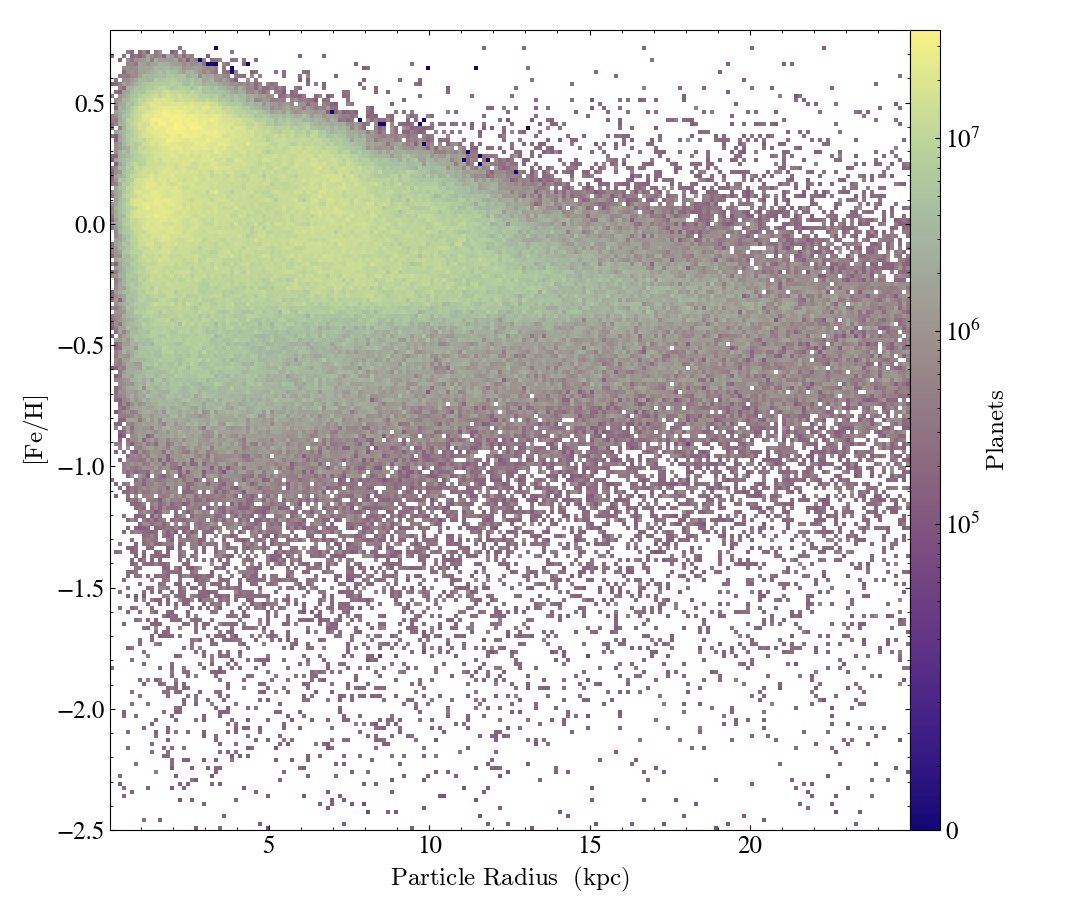

In [12]:
profile = yt.create_profile(
    mw.sphere(radius=ds.quan(25,'kpc')), # should be data_source
    [("stars", "particle_radius"), ("stars", "[Fe/H]")],
    n_bins=[200, 200],
    fields=[("stars", "planets")],
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False, ('stars', '[Fe/H]'): False},
    weight_field=None,
    deposition = "cic"
)
plot = yt.PhasePlot.from_profile(profile)

plot.set_log(("stars", "particle_radius"), False)
plot.set_log(("stars", "[Fe/H]"), False)
plot.set_ylim( ymin=-2.5, ymax=0.8)
plot.set_cmap(("stars", "planets"), "kelp")
plot.show()


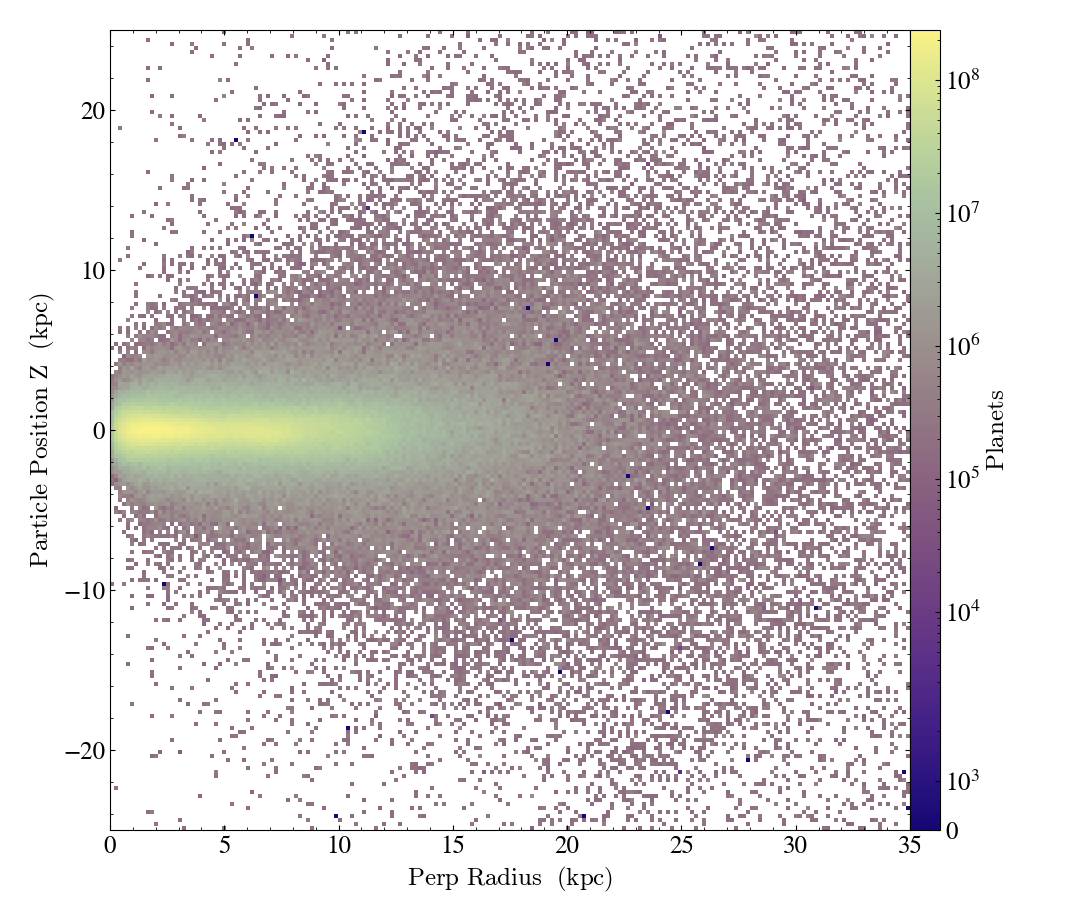

In [13]:
profile = yt.create_profile(
    rotated_data.sphere(center=[0,0,0], radius=ds.quan(50,"kpc")), # should be data_source
    [("stars", "perp_radius"), ("stars", "particle_position_z")],
    n_bins=[200, 200],
    fields=[("stars", "planets")],
    units={('stars', 'particle_position_z'): 'kpc', ('stars', 'perp_radius'): 'kpc'},
    logs={('stars', 'particle_position_z'): False, ('stars', 'perp_radius'): False},
    weight_field=None,
    deposition = "cic",
)
plot = yt.PhasePlot.from_profile(profile)

plot.set_log(("stars", "perp_radius"), False)
plot.set_log(("stars", "particle_position_z"), False)
plot.set_ylim(ymin=-25, ymax=25)
plot.set_xlim(xmin=0, xmax=35)
plot.set_cmap(("stars", "planets"), "kelp")
plot.show()